In [1]:
#!unzip /content/classificacao_binaria.zip

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import shutil
import pathlib

# Data Exploration

In [3]:
data_dir = pathlib.Path("/content/classificacao_binaria")
target_dir = "/content/binaria"

def dataset(dataset_path: os.PathLike, target_path: os.PathLike) -> None:
    os.makedirs(os.path.join(target_path, "benign"), exist_ok=True)
    os.makedirs(os.path.join(target_path, "malignant"), exist_ok=True)

    for zoom_level in os.listdir(dataset_path):
        zoom_path = os.path.join(dataset_path, zoom_level)
        if not os.path.isdir(zoom_path):
            continue

        for label in os.listdir(zoom_path):
            label_path = os.path.join(zoom_path, label)
            if not os.path.isdir(label_path):
                continue

            for file_name in os.listdir(label_path):
                old_file_path = os.path.join(label_path, file_name)
                new_file_name = f"{zoom_level}_{file_name}"
                new_file_path = os.path.join(target_path, label, new_file_name)

                shutil.move(old_file_path, new_file_path)

dataset(data_dir, target_dir)

In [4]:
data_dir = pathlib.Path("/content/binaria")

import tensorflow as tf

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(256, 256),
    batch_size=32,
    labels = 'inferred',
    label_mode = 'binary'
)

dataset

Found 7909 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [5]:
class_names = dataset.class_names
print(class_names)

['benign', 'malignant']


In [6]:
from PIL import Image, UnidentifiedImageError

corrupt_images = []

for subdir, dirs, files in os.walk(data_dir):
    for file in files:
        file_path = os.path.join(subdir, file)
        try:
            with Image.open(file_path) as img:
                img.verify()
        except (UnidentifiedImageError, OSError, ValueError) as e:
            print(f"Corrupt or unreadable image: {file_path}. Error: {e}")
            corrupt_images.append(file_path)

if corrupt_images:
    print(f"\nFound {len(corrupt_images)} corrupt images:")
    for corrupt_file in corrupt_images:
        print(corrupt_file)
else:
    print("\nNo corrupt images found in the dataset.")


No corrupt images found in the dataset.


# Data Visualization

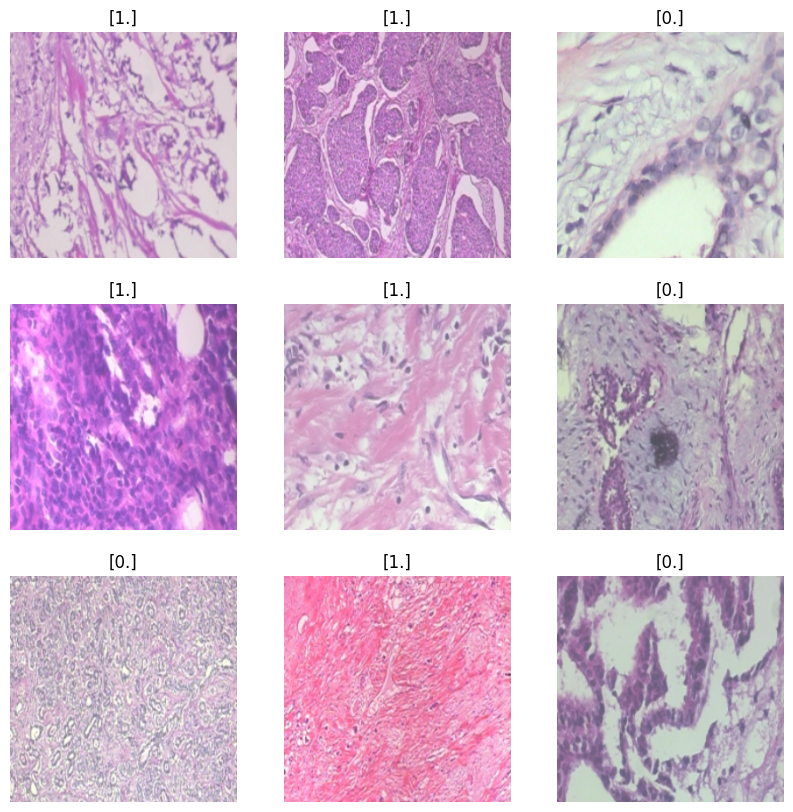

In [7]:
plt.figure(figsize=(10, 10))
for imgs, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(imgs[i].numpy().astype('uint8'))
        plt.title(labels[i].numpy())
        plt.axis('off')
plt.show()

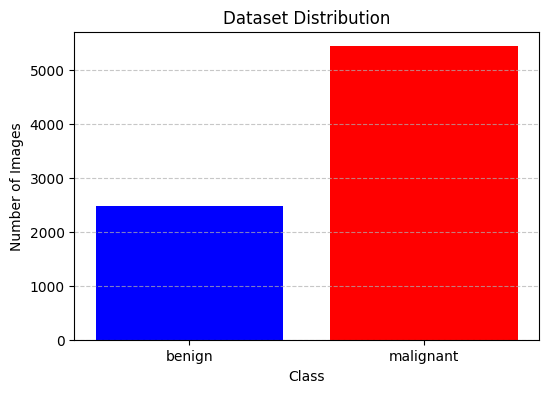

In [ ]:
def plot_dataset_distribution(data_dir, class_names):
    class_counts = []
    for label in class_names:
      label_path = os.path.join(data_dir, label)
      label_path = pathlib.Path(label_path)
      image_count = len(list(label_path.glob('*.png')))
      class_counts.append(image_count)

    plt.figure(figsize=(6, 4))
    plt.bar(class_names, class_counts, color=['blue', 'red'])
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.title("Dataset Distribution")
    plt.grid(axis='y', linestyle="--", alpha=0.7)
    plt.show()

plot_dataset_distribution(data_dir, class_names)